In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
continents = pd.read_csv('../data/continents.csv')

In [3]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [4]:
continents.isna().sum()

Continent    0
Country      0
dtype: int64

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [6]:
gdp_df = pd.read_csv('../data/UNdata_Export_20241004_025443555.csv')

In [7]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [11]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

#### 7662 rows and 3 columns plus an index... - 

In [14]:
gdp_df.shape

(7662, 3)

In [15]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


#### float if decimal values integers int if full number - object is text or something it can't fit into another category

In [17]:
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format='%Y').dt.to_period('Y')

In [18]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [19]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   Country         7662 non-null   object       
 1   Year            7662 non-null   period[Y-DEC]
 2   GDP_Per_Capita  7662 non-null   float64      
dtypes: float64(1), object(1), period[Y-DEC](1)
memory usage: 179.7+ KB


### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [21]:
gdp_df['Year'].unique()

<PeriodArray>
['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
 '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
 '2003', '2002', '2022', '2001', '2000', '1999', '1998', '1997', '1996',
 '1995', '1994', '1993', '1992', '1991', '1990']
Length: 33, dtype: period[Y-DEC]

In [22]:
gdp_df['Year'].nunique()

33

In [23]:
gdp_df.value_counts(gdp_df['Year'] == '2002')

Year
False    7427
True      235
Name: count, dtype: int64

In [24]:
gdp_df['Year'].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Freq: Y-DEC, Name: count, dtype: int64

In [25]:
gdp_df['Year'].value_counts(ascending=True)

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2007    237
2006    237
2008    238
2009    239
2010    239
2011    240
2012    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
Freq: Y-DEC, Name: count, dtype: int64

In [26]:
gdp_df['Year'].max()

Period('2022', 'Y-DEC')

In [27]:
gdp_df['Year'].min()

Period('1990', 'Y-DEC')

#### The number of occurrences per year - perhaps the number of countries counted - fluctuates per year 

### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [30]:
gdp_df['Country'].nunique()

242

In [31]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
 

In [32]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [33]:
gdp_df['Country'].value_counts(ascending=True)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
                             ..
Jamaica                      33
Japan                        33
Jordan                       33
IDA total                    33
Zimbabwe                     33
Name: count, Length: 242, dtype: int64

In [34]:
gdp_df['Country'].value_counts().tail(10)

Country
CuraÃ§ao                     22
SÃ£o TomÃ© and Principe      22
Afghanistan                  20
Nauru                        19
Cayman Islands               16
Kosovo                       15
Sint Maarten (Dutch part)    14
Turks and Caicos Islands     12
Somalia                      10
Djibouti                     10
Name: count, dtype: int64

#### These are areas, cities, and coutries and regions all mixed in

#### The SDMX Metadata Common Vocabulary contains concepts and related definitions to which terminology used in structural and reference metadata of international organisations and national data producing agencies may be mapped. The content includes a selected range of metadata concepts: (1) General metadata concepts, mostly derived from ISO, UNECE and UN documents, useful for providing a general context to metadata management; (2) Metadata terms describing statistical methodologies (frequency, reference period, data collection, source, adjustment, etc.); (3) Metadata for assessing quality (accuracy, timeliness, etc.), and (4) Terms referring specifically to data and metadata exchange (terminology from the SDMX information model and from existing data structure definitions, etc.).

### 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [38]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == '2021']
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [40]:
gdp_2021.describe()

,GDP_Per_Capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


#### 11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

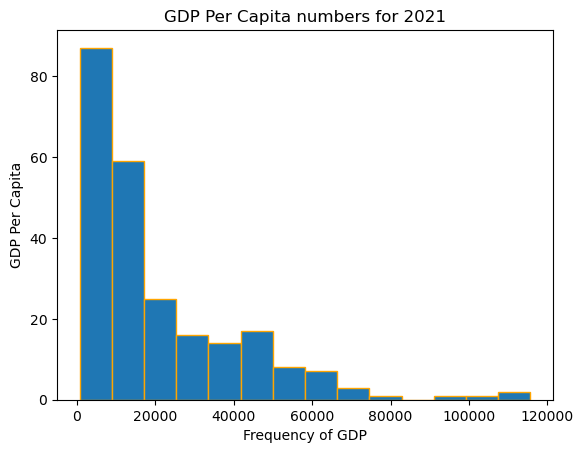

In [42]:
plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
        edgecolor='orange',
    linewidth=1,
    bins="auto"
)
plt.xlabel('Frequency of GDP')                            
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita numbers for 2021');

#### Right skewed for sure

### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [45]:
gdp_2021.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [46]:
gdp_2021.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [48]:
gdp_1990 = gdp_df.loc[gdp_df['Year'] == '1990']
gdp_1990

,Country,Year,GDP_Per_Capita
52,Africa Eastern and Southern,1990,3037.297466
85,Africa Western and Central,1990,2788.301039
118,Albania,1990,4827.027705
151,Algeria,1990,8828.874473
184,Angola,1990,5793.084512
...,...,...,...
7500,Vanuatu,1990,2774.138350
7533,Viet Nam,1990,2099.394649
7595,World,1990,9705.981267
7628,Zambia,1990,2290.039226


In [49]:
gdp_1990.isna().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [50]:
gdp_1990 = gdp_1990.dropna()

In [51]:
gdp_1990.isna().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [52]:
gdp_2021.isna().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

### Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [54]:
gdp_middle_process = gdp_df.pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')
gdp_middle_process

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266,NaN
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400,5722.409175
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


In [55]:
gdp_middle_process.isna().sum()

Year
1990    35
1991    34
1992    32
1993    31
1994    29
1995    19
1996    19
1997    16
1998    16
1999    15
2000     9
2001     8
2002     7
2003     7
2004     6
2005     6
2006     5
2007     5
2008     4
2009     3
2010     3
2011     2
2012     2
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     1
2022    10
Freq: Y-DEC, dtype: int64

In [56]:
len(gdp_middle_process.columns)

33

In [57]:
gdp_end_process = gdp_middle_process.drop(gdp_middle_process.columns[1:31], axis=1)

In [58]:
gdp_end_process

Year,1990,2021,2022
Country,,,
Afghanistan,NaN,1517.016266,NaN
Africa Eastern and Southern,3037.297466,3519.174840,3553.913370
Africa Western and Central,2788.301039,4014.607965,4063.857691
Albania,4827.027705,14595.944386,15501.662931
Algeria,8828.874473,11029.138782,11187.382303
...,...,...,...
Viet Nam,2099.394649,10628.219166,11396.531469
West Bank and Gaza,NaN,5641.044400,5722.409175
World,9705.981267,17055.357429,17485.934316


In [59]:
gdp_end_process = gdp_end_process.drop(gdp_end_process.columns[2], axis=1)
gdp_end_process

Year,1990,2021
Country,,
Afghanistan,NaN,1517.016266
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
...,...,...
Viet Nam,2099.394649,10628.219166
West Bank and Gaza,NaN,5641.044400
World,9705.981267,17055.357429


In [75]:
gdp_end_process.isna().sum()

Year
1990    35
2021     1
Freq: Y-DEC, dtype: int64

### 13 STILL Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [79]:
gdp_end_process.notna().sum()

Year
1990    207
2021    241
Freq: Y-DEC, dtype: int64

In [83]:
gdp_end_process = gdp_end_process[gdp_end_process['1990'].notna()]
gdp_end_process

Year,1990,2021
Country,,
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
Angola,5793.084512,5911.835657
...,...,...
Vanuatu,2774.138350,2800.493866
Viet Nam,2099.394649,10628.219166
World,9705.981267,17055.357429


In [91]:
gdp_end_process.isna().sum()

Year
1990    0
2021    0
Freq: Y-DEC, dtype: int64

In [93]:
gdp_pivoted = gdp_end_process[gdp_end_process['2021'].notna()]
gdp_pivoted

Year,1990,2021
Country,,
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
Angola,5793.084512,5911.835657
...,...,...
Vanuatu,2774.138350,2800.493866
Viet Nam,2099.394649,10628.219166
World,9705.981267,17055.357429


In [95]:
gdp_pivoted.isna().sum()

Year
1990    0
2021    0
Freq: Y-DEC, dtype: int64

### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [113]:
gdp_pivoted["Percent_Change"] = 100 * (gdp_pivoted["2021"] - gdp_pivoted["1990"]) / gdp_pivoted["1990"]

In [115]:
gdp_pivoted

Year,1990,2021,Percent_Change
Country,,,
Africa Eastern and Southern,3037.297466,3519.174840,15.865334
Africa Western and Central,2788.301039,4014.607965,43.980435
Albania,4827.027705,14595.944386,202.379544
Algeria,8828.874473,11029.138782,24.921232
Angola,5793.084512,5911.835657,2.049878
...,...,...,...
Vanuatu,2774.138350,2800.493866,0.950043
Viet Nam,2099.394649,10628.219166,406.251608
World,9705.981267,17055.357429,75.720074


### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [142]:
negative_percent_change = gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]
len(negative_percent_change)

19

In [144]:
negative_percent_change

Year,1990,2021,Percent_Change
Country,,,
Barbados,14097.395550,13754.802423,-2.430187
Brunei,70358.724094,60127.023689,-14.542192
Burundi,1175.155086,714.066712,-39.236385
Central African Republic,1200.613390,837.504686,-30.243599
Congo,5007.319245,3234.392972,-35.406695
Dem. Rep. Congo,1750.169739,1073.643271,-38.654906
Fragile and conflict affected situations,4864.814075,4333.881033,-10.913738
Gabon,17559.006114,13814.495200,-21.325301
Guinea-Bissau,1998.173206,1831.383229,-8.347123


### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare? Bonus: Put both line charts on the same plot.

### Which country had the highest % change in GDP per capita?

In [156]:
gdp_pivoted["Percent_Change"].nlargest(1)

Country
Equatorial Guinea    1463.08187
Name: Percent_Change, dtype: float64

### Create a line plot showing this country's GDP per capita for all years from 1990 to 2022.

In [174]:
gdp_equatorial_guinea = gdp_df[gdp_df['Country'] == "Equatorial Guinea"]
gdp_equatorial_guinea

,Country,Year,GDP_Per_Capita
2001,Equatorial Guinea,2022,14732.917816
2002,Equatorial Guinea,2021,14637.007350
2003,Equatorial Guinea,2020,15132.379974
2004,Equatorial Guinea,2019,16240.369810
2005,Equatorial Guinea,2018,17764.969630
2006,Equatorial Guinea,2017,19617.844705
2007,Equatorial Guinea,2016,21566.057048
2008,Equatorial Guinea,2015,24563.500604
2009,Equatorial Guinea,2014,28106.198389
2010,Equatorial Guinea,2013,29143.021802


<Axes: xlabel='Year'>

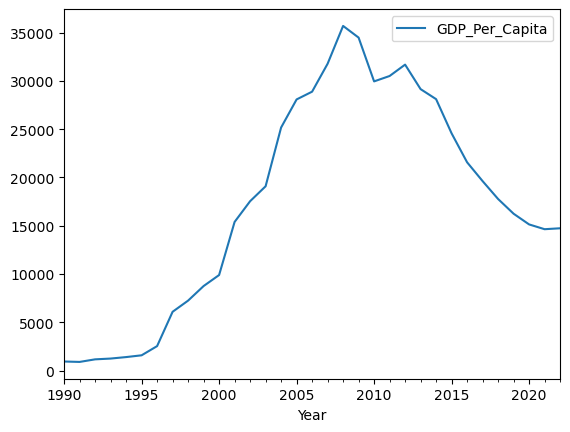

In [190]:
gdp_equatorial_guinea.plot(
    x="Year", 
    y="GDP_Per_Capita"      
                          )

### 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [198]:
continents = pd.read_csv('../data/continents.csv')

In [200]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [204]:
gdp_df = pd.merge(gdp_df, continents, on = ["Country"], how = "inner")
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


### 19. Determine the number of countries per continent. Create a bar chart showing this.

In [207]:
gdp_df.groupby('Continent')['Country'].nunique()

Continent
Africa           50
Asia             41
Europe           44
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

### Create a bar chart showing this.

### 20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?